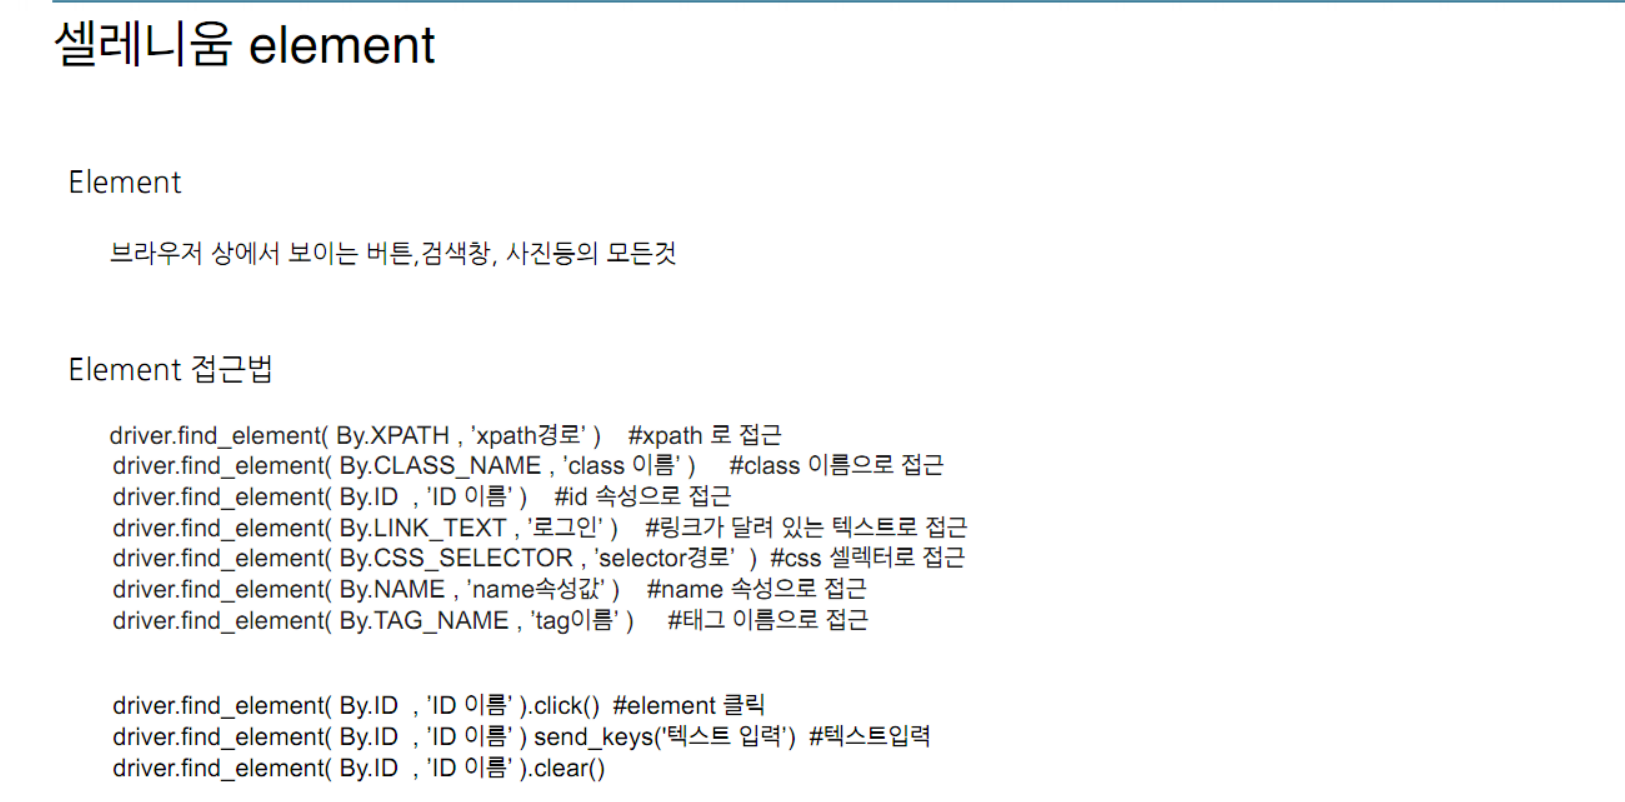

In [1]:
from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup as BS
import time
import pandas as pd

In [2]:
driver=webdriver.Chrome('./chromedriver.exe')

try:
    url='https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=%EA%B5%AD%EB%82%B4%EC%97%AC%ED%96%89'

    driver.get(url)
    time.sleep(2)
    
    html=driver.page_source
except Exception as e:
    print(e)
finally:
    driver.close()
    driver.quit()
    
    

C:\Users\hmh\AppData\Local\Temp\ipykernel_5028\1656831409.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver.exe')


In [3]:
soup=BS(html,'html.parser')

div_tags=soup.find_all('div','desc')

result=[]
for div in div_tags:
    title=div.find('span','title').text
    link=div.find('a','desc_inner')['ng-href']
    result.append([title,link])
    
df=pd.DataFrame(result,columns=['제목','url'])
display(df)

,제목,url
0,"[국내여행]평창맛집 - 풀내음(막국수, 메밀전병, 메밀음식)",https://blog.naver.com/adult_jinhee/222843278276
1,[가족/국내여행]강원도 화천 평화의 댐,https://blog.naver.com/crazysun0012/222841910972
2,"[강릉: 국내여행] 숙소후기_강릉역, 궁전모텔",https://blog.naver.com/twinkling_j/222840699852
3,경주 가볼만한곳 경주 여행 코스 1박2일 여름 국내여행 추천,https://blog.naver.com/parangusl_/222803790151
4,[국내여행] 통영펜션 '타셋펜션' 오션뷰 펜션 후기 국내여행지추천,https://blog.naver.com/rlawkdud13/222841954575
5,여름휴가 국내 여행 준비 소형 16인치 레투 캐리어 구매,https://blog.naver.com/fantastic_ho/222842237431
6,연꽃과 메타세쿼이아 길이 아름다운 반려동물 동반 국내 여행 추천 충남 공주 투어,https://blog.naver.com/ppikkazzu/222843205087


In [6]:
start=time.time()
driver=webdriver.Chrome('./chromedriver.exe')

contents=[]
for url in df['url']:
    try:
        driver.get(url)
        time.sleep(2)


        iframe=driver.find_element(By.ID, 'mainFrame')
        driver.switch_to.frame(iframe) #irame 창으로 이동함

        html=driver.page_source
        
        soup=BS(html,'html.parser')
        cont=soup.find('div','se-main-container').text.replace('\n','')
        contents.append(cont)
        
        
    except Exception as e:
        print(e)

driver.close()
driver.quit()

df['내용']=contents
display(df)

print(time.time()-start)

C:\Users\hmh\AppData\Local\Temp\ipykernel_5028\1446016216.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver.exe')


,제목,url,내용
0,"[국내여행]평창맛집 - 풀내음(막국수, 메밀전병, 메밀음식)",https://blog.naver.com/adult_jinhee/222843278276,이번 휴가기간동안은 평창으로 국내여행을떠나게 되었답니다. 아직은 ㅋㄹㄴ가 심하니 해...
1,[가족/국내여행]강원도 화천 평화의 댐,https://blog.naver.com/crazysun0012/222841910972,​​ ​​여행 자체보다 드라이브를 좋아하는 아버지의 취향으로 계획을 잡았다.​우리 ...
2,"[강릉: 국내여행] 숙소후기_강릉역, 궁전모텔",https://blog.naver.com/twinkling_j/222840699852,"[강릉: 국내여행] 숙소후기_강릉역, 궁전모텔#강릉 #일상 #주말 #국내여행 #강릉..."
3,경주 가볼만한곳 경주 여행 코스 1박2일 여름 국내여행 추천,https://blog.naver.com/parangusl_/222803790151,본격적인 휴가철 맞아 여름 국내여행다니는 분들 많죠? 경주 가볼만한곳경주 1박2일...
4,[국내여행] 통영펜션 '타셋펜션' 오션뷰 펜션 후기 국내여행지추천,https://blog.naver.com/rlawkdud13/222841954575,통영펜션 리뷰바다가 보이는 오션뷰 스파 펜션타셋펜션​ 1000m© NAVER Cor...
5,여름휴가 국내 여행 준비 소형 16인치 레투 캐리어 구매,https://blog.naver.com/fantastic_ho/222842237431,다음 주에 동생 가족과 가평을 가기로 했다. 조카가 태어나고 처음 같이 가는 여행이...
6,연꽃과 메타세쿼이아 길이 아름다운 반려동물 동반 국내 여행 추천 충남 공주 투어,https://blog.naver.com/ppikkazzu/222843205087,요즘은 덜하긴 그래도 예전만큼 쉽게 해외로 여행을 다니긴 힘든 상황그래서 2년 동안...


23.511909008026123
